In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('C:/Users/tejan/Desktop/Data_Science_Practice/data.csv')

In [71]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [72]:
df.shape

(569, 33)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [74]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace= True)

In [75]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [76]:
df['diagnosis']= np.where(df['diagnosis'] == 'M', 1, 0)

In [77]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [78]:
df.isnull().any().sum()

0

In [79]:
df.describe(percentiles=[.01, .1, .25 , .5, .75, .9 , .95, .99]).T.head()

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
diagnosis,569.0,0.372583,0.483918,0.000,0.00000,0.000,0.00,0.00,1.00,1.000,1.000,1.0000,1.00
radius_mean,569.0,14.127292,3.524049,6.981,8.45836,10.260,11.70,13.37,15.78,19.530,20.576,24.3716,28.11
texture_mean,569.0,19.289649,4.301036,9.710,10.93040,14.078,16.17,18.84,21.80,24.992,27.150,30.6520,39.28
perimeter_mean,569.0,91.969033,24.298981,43.790,53.82760,65.830,75.17,86.24,104.10,129.100,135.820,165.7240,188.50
area_mean,569.0,654.889104,351.914129,143.500,215.66400,321.600,420.30,551.10,782.70,1177.400,1309.800,1786.6000,2501.00


In [172]:
df.shape

(569, 18)

## Doing feature engineering

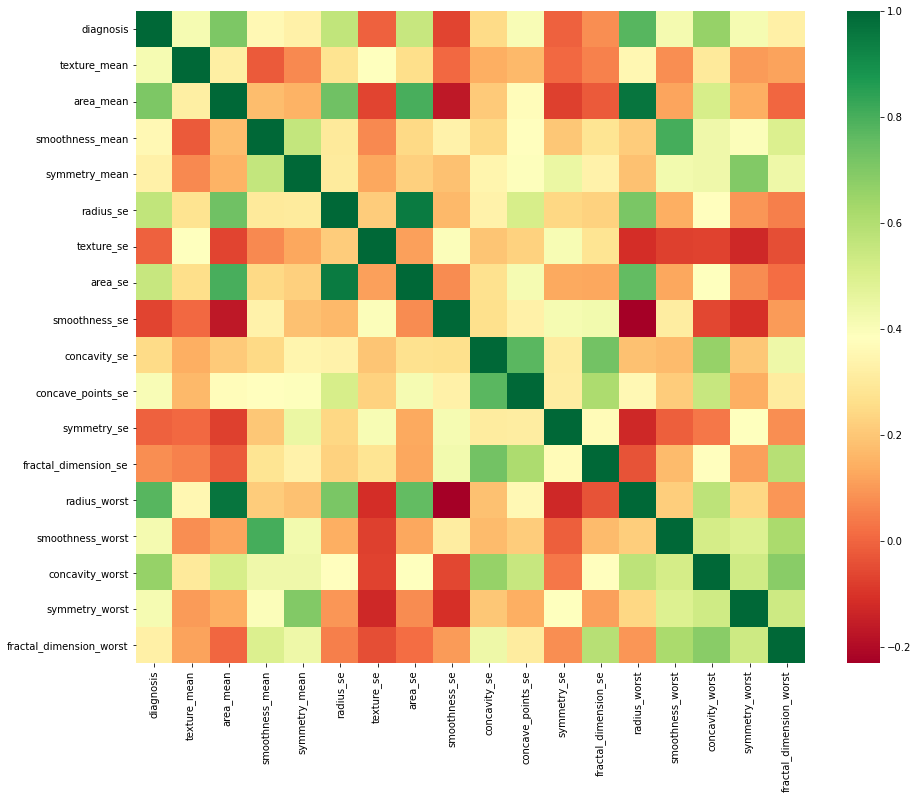

In [173]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr() ,cmap ='RdYlGn')


In [174]:
df.corr().to_csv('C:/Users/tejan/Desktop/corr.csv')

In [175]:
df.rename(columns = {'concave points_mean' : 'concave_points_mean', 'concave points_se' : 'concave_points_se',
                    'concave points_worst' : 'concave_points_worst'}, inplace = True)

In [ ]:
# checking multicoleaneaarity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

In [176]:
train, test = train_test_split(df, test_size = 0.3, random_state = 123)

In [177]:
feature_columns = df.columns.difference (['diagnosis'])


In [178]:
#creating VIF
model_param = 'diagnosis ~ ' + ' + '.join(feature_columns)


In [179]:
y, X = dmatrices(model_param , train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
# vif.round(1)


In [180]:
vif.round(1).sort_values('VIF Factor', ascending= False).to_csv('C:/Users/tejan/Desktop/VIF.csv')

In [181]:
# Creating Rf variable importance for the first cut 

In [182]:
X = df.drop(['diagnosis'], axis = 1 )
Y = df['diagnosis']

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
pargrid_rf = {'n_estimators': [ 20,40,50,60,80, 100],
                  'max_features': [5, 6, 7, 8, 9, 10]}

from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    9.9s finished


In [194]:
gscv_rf.best_params_

{'max_features': 6, 'n_estimators': 50}

In [195]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=50, max_features=6, n_jobs=-1)
radm_clf.fit( X_train, Y_train )

RandomForestClassifier(max_features=6, n_estimators=50, n_jobs=-1,
                       oob_score=True)

In [196]:
radm_test_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': radm_clf.predict( X_test ) } )

from sklearn import metrics

print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.9824561403508771
0.98043974871502


In [197]:
radm_train_pred = pd.DataFrame( { 'actual':  Y_train,
                            'predicted': radm_clf.predict( X_train ) } )

print(metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted ))
print(metrics.roc_auc_score( radm_train_pred.actual, radm_train_pred.predicted ))

1.0
1.0


In [198]:
feature_columns = df.columns.difference( ['diagnosis'] )

In [199]:
xxx = pd.DataFrame({'feature':feature_columns, 'importance':radm_clf.feature_importances_})

In [200]:
xxx.sort_values('importance', ascending= False).reset_index()

,index,feature,importance
0,12,symmetry_mean,0.374498
1,1,area_se,0.148220
2,14,symmetry_worst,0.114366
3,6,fractal_dimension_worst,0.112280
4,4,concavity_worst,0.059337
5,0,area_mean,0.038530
6,13,symmetry_se,0.031018
7,15,texture_mean,0.021051
8,16,texture_se,0.020273
9,8,radius_worst,0.018050


In [141]:
df.drop(['perimeter_mean','concavity_mean', 'radius_mean', 'concave points_mean',  ], axis = 1, inplace = True)

In [171]:
df.drop(['perimeter_se' , 'perimeter_worst' , 'compactness_worst','compactness_mean', 'compactness_se', 
        'concave_points_worst', 'area_worst', 'texture_worst', 'fractal_dimension_mean'], axis = 1, inplace = True)

In [201]:
# lets check variable importance from RFE

In [206]:
from sklearn import datasets
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(X, Y )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

[False False False False False  True False False False False False False
  True  True  True  True False]
[ 5 13  4  2 10  1  6  9 11  7  8 12  1  1  1  1  3]


In [207]:
# to identidy columns

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['texture_se', 'radius_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']


In [208]:
rdf = RandomForestClassifier()
rfe = RFE(rdf, 5)
rfe = rfe.fit(X, Y )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[False  True False False False False  True False False False False False
  True  True  True False False]
[ 4  1  8 12  2 13  1 10  6  7 11  9  1  1  1  3  5]


In [209]:
# to identidy columns

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['area_mean', 'area_se', 'radius_worst', 'smoothness_worst', 'concavity_worst']
